In [2]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# 데이터 준비
x_data = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)

y_data = np.array([0, 1, 1, 0], dtype=np.int32)

# MLPClassifier 모델 생성
# hidden_layer_sizes=(10,) - 뉴런 10개를 가진 은닉층 1개 설정
# activation='tanh' - tanh 활성화 함수 사용
# solver='sgd' - 확률적 경사 하강법 사용
# learning_rate_init=0.1 - 학습률 0.1로 설정
# max_iter=1001 - 최대 1001번 반복
# random_state=42 - 재현성을 위한 랜덤 시드 설정
model = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='tanh',
    solver='sgd',
    learning_rate_init=0.01,
    max_iter=1001,
    batch_size=4,
    random_state=42,
    verbose=True
)


# 모델 학습
model.fit(x_data, y_data)

# 예측 및 정확도 계산
predictions = model.predict(x_data)
accuracy = np.mean(predictions == y_data)
prediction_proba = model.predict_proba(x_data)

# 결과 출력
print("\n최종 결과:")
print(f"예측 확률 = \n{prediction_proba}")
print(f"예측 값 = {predictions}")
print(f"정확도 = {accuracy}")


Iteration 1, loss = 0.92632949
Iteration 2, loss = 0.91926290
Iteration 3, loss = 0.90946595
Iteration 4, loss = 0.89749309
Iteration 5, loss = 0.88388884
Iteration 6, loss = 0.86917224
Iteration 7, loss = 0.85382587
Iteration 8, loss = 0.83828593
Iteration 9, loss = 0.82293477
Iteration 10, loss = 0.80809765
Iteration 11, loss = 0.79403817
Iteration 12, loss = 0.78095923
Iteration 13, loss = 0.76900407
Iteration 14, loss = 0.75825984
Iteration 15, loss = 0.74876253
Iteration 16, loss = 0.74050340
Iteration 17, loss = 0.73343635
Iteration 18, loss = 0.72748576
Iteration 19, loss = 0.72255391
Iteration 20, loss = 0.71852926
Iteration 21, loss = 0.71529208
Iteration 22, loss = 0.71272169
Iteration 23, loss = 0.71070045
Iteration 24, loss = 0.70911811
Iteration 25, loss = 0.70787433
Iteration 26, loss = 0.70688022
Iteration 27, loss = 0.70605976
Iteration 28, loss = 0.70534977
Iteration 29, loss = 0.70469925
Iteration 30, loss = 0.70406879
Iteration 31, loss = 0.70342960
Iteration 32, los

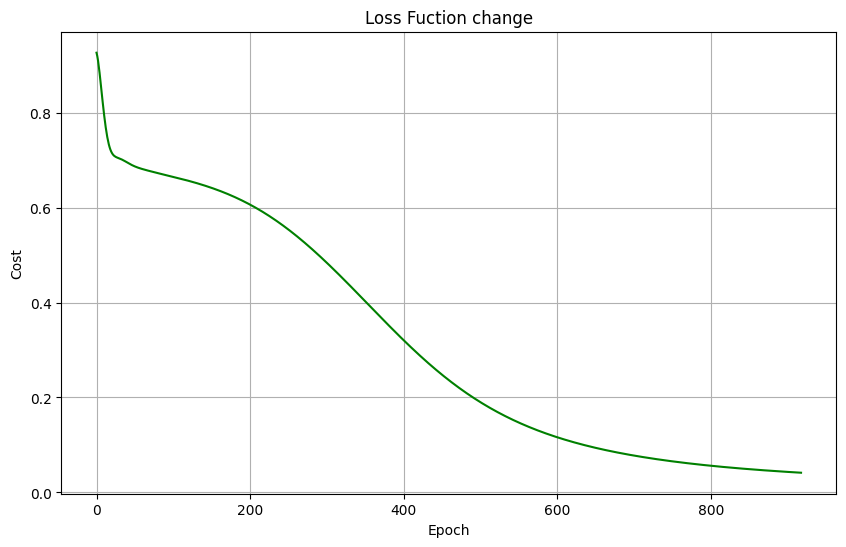

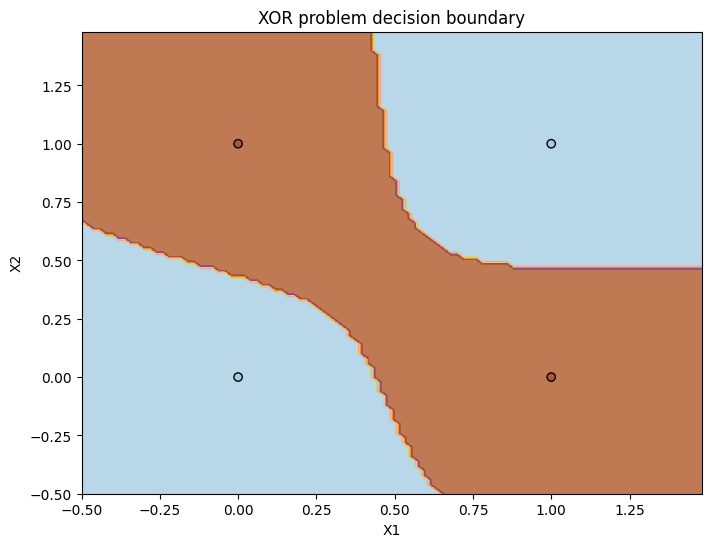

In [4]:

# 손실 함수 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_, color='green')
plt.title('Loss Fuction change')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# 결정 경계 시각화
plt.figure(figsize=(8, 6))
h = 0.02  # 격자 크기
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap=plt.cm.Paired, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('XOR problem decision boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()